# <font color='Blue'>CS109 Project : Educational Oversight</font>

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## <font color='Blue'>Parse Data - Teacher's Salary, Years of Experience, Highest Qualification</font>

In [2]:
df_year_salary_exp_qual = pd.read_csv("Teacher_Year_Salary_Experience_Qualification.csv")
print df_year_salary_exp_qual.shape
df_year_salary_exp_qual.head()

(240, 4)


Year Qualification Experience  Average Base Salary
0  1990-91      Bachelor  1 or less                37160
1  1990-91      Bachelor          2                37400
2  1990-91      Bachelor          3                38770
3  1990-91      Bachelor          4                39990
4  1990-91      Bachelor          5                41580

In [3]:
df_state_2011_salary_exp = pd.read_csv("Teacher_State_2011_Salary_Experience.csv")
print df_state_2011_salary_exp.shape
df_state_2011_salary_exp.head()

(51, 7)


State     Year  2 or fewer years  3 to 5 years  6 to 10 years  11 to 20 years  Over 20 years
0     Alabama  2011-12             35030         39070          40150           43490          46810
1      Alaska  2011-12             47930         50790            NaN           65020            NaN
2     Arizona  2011-12             32850         35170          35650           41010          46640
3    Arkansas  2011-12             37390         36200          39540           43390          48000
4  California  2011-12             47310         48930          58570           66030          73980

## <font color='Blue'>Parse Data - merged.csv</font>

In [4]:
df_merged_overall = pd.read_csv("merged.csv")
print df_merged_overall.shape
df_merged_overall.head()

(1428, 69)


state_name  year  secondary_teachers  total_rd_expenditures  pupil_teacher_ratio  full_time_equivalent  grade_9_students_enrollment  grade_10_students_enrollment  grade_11_students_enrollment  grade_12_students_enrollment  grade_9_dropouts  grade_10_dropouts  grade_11_dropouts  grade_12_dropouts  grades_9_12_dropouts  no_of_sat_test_takers  critical_reading_mean  critical_reading_sd  mathematics_mean  mathematics_sd  writing_mean  writing_sd  no_high_school_diploma  \
0    ALABAMA  2013            14133.06                    NaN                15.82              47161.77                        62069                         56144                         51527                         48965               864               1128               1048                862                  3902                   3172                    547                  119               538             122           532         118                     256   
1    ALABAMA  2003            19918.00                 557859                12.60              58070.00                        62718                         53695                         47489                         42005               NaN                NaN                NaN                NaN                   NaN                    NaN                    NaN                  NaN               NaN             NaN           NaN         NaN                     381   
2    ALABAMA  2012            21449.70                    NaN                14.35              51877.22                        61642                         56229                         50387                         48945               865                900                829                698                  3292                   3558                    544                  117               534             121           530         118                     238   
3     ALASKA  2003             2329.00                 140641                17.20               7808.00                        11803                         10623                          9161                          8651               NaN                NaN                NaN                NaN                   NaN                    NaN                    NaN                  NaN               NaN             NaN           NaN         NaN                      22   
4    ALABAMA  2011            20759.19                    NaN                15.60              47722.67                        61412                         55908                         50785                         49510              1256               1335               1221                842                  4654                   3879                    528                  121               531             121           527         116                     310   

   high_school_or_equivalent  some_college_less_than_4_yr_degree  bachelors_degree_or_higher  american_indian_alaska_native_male_grade_9  american_indian_alaska_native_female_grade_9  asian_or_asian_pacific_islander_male_grade_9  asian_or_asian_pacific_islander_female_grade_9  hispanic_male_grade_9  hispanic_female_grade_9  black_male_grade_9  black_female_grade_9  white_male_grade_9  white_female_grade_9  american_indian_alaska_native_male_grade_10  \
0                        615                                 496                         550                                         NaN                                           NaN                                           NaN                                             NaN                    NaN                      NaN                 NaN                   NaN                 NaN                   NaN                                          NaN   
1                        570                                 448                         414                                         280                                           229                                           300         

In [5]:
# Create a new column "Total enrollment"
df_merged_overall['Total enrollment'] = df_merged_overall['grade_9_students_enrollment'] + df_merged_overall['grade_10_students_enrollment'] + df_merged_overall['grade_11_students_enrollment'] + df_merged_overall['grade_12_students_enrollment']

In [6]:
# Create a new column "SAT mean score"
df_merged_overall['SAT mean score'] = df_merged_overall['critical_reading_mean'] + df_merged_overall['mathematics_mean'] + df_merged_overall['writing_mean']


## <font color='Blue'>Normalization</font>

In [7]:
# Duplicate the dataframe for refinement
df_normalized_merged_overall = df_merged_overall

# Generate the list of column names to be normalized
list_column = list(df_merged_overall.columns.values)
exclude_list = ['state_name', 'year', 'pupil_teacher_ratio', 
                'critical_reading_mean', 'critical_reading_sd', 
                'mathematics_mean', 'mathematics_sd', 'writing_mean', 
                'writing_sd', 'Total enrollment', 'SAT mean score']

# Normalizing with number of enrollments of each state
for col_name in list_column:
    if col_name not in exclude_list:
        try: df_normalized_merged_overall[col_name] = df_normalized_merged_overall[col_name] / df_merged_overall['Total enrollment']
        except: 
            print "warning non numerical value", col_name
    
print df_normalized_merged_overall.shape
df_normalized_merged_overall.head()

(1428, 71)


state_name  year  secondary_teachers  total_rd_expenditures  pupil_teacher_ratio  full_time_equivalent  grade_9_students_enrollment  grade_10_students_enrollment  grade_11_students_enrollment  grade_12_students_enrollment  grade_9_dropouts  grade_10_dropouts  grade_11_dropouts  grade_12_dropouts  grades_9_12_dropouts  no_of_sat_test_takers  critical_reading_mean  critical_reading_sd  mathematics_mean  mathematics_sd  writing_mean  writing_sd  no_high_school_diploma  \
0    ALABAMA  2013            0.064622                    NaN                15.82              0.215641                     0.283802                      0.256711                      0.235600                      0.223886          0.003951           0.005158           0.004792           0.003941              0.017841               0.014504                    547                  119               538             122           532         118                0.001171   
1    ALABAMA  2003            0.096733               2.709277                12.60              0.282021                     0.304594                      0.260773                      0.230633                      0.204000               NaN                NaN                NaN                NaN                   NaN                    NaN                    NaN                  NaN               NaN             NaN           NaN         NaN                0.001850   
2    ALABAMA  2012            0.098754                    NaN                14.35              0.238842                     0.283799                      0.258878                      0.231981                      0.225342          0.003982           0.004144           0.003817           0.003214              0.015156               0.016381                    544                  117               534             121           530         118                0.001096   
3     ALASKA  2003            0.057881               3.495228                17.20              0.194045                     0.293330                      0.264004                      0.227670                      0.214996               NaN                NaN                NaN                NaN                   NaN                    NaN                    NaN                  NaN               NaN             NaN           NaN         NaN                0.000547   
4    ALABAMA  2011            0.095394                    NaN                15.60              0.219299                     0.282205                      0.256912                      0.233371                      0.227512          0.005772           0.006135           0.005611           0.003869              0.021386               0.017825                    528                  121               531             121           527         116                0.001425   

   high_school_or_equivalent  some_college_less_than_4_yr_degree  bachelors_degree_or_higher  american_indian_alaska_native_male_grade_9  american_indian_alaska_native_female_grade_9  asian_or_asian_pacific_islander_male_grade_9  asian_or_asian_pacific_islander_female_grade_9  hispanic_male_grade_9  hispanic_female_grade_9  black_male_grade_9  black_female_grade_9  white_male_grade_9  white_female_grade_9  american_indian_alaska_native_male_grade_10  \
0                   0.002812                            0.002268                    0.002515                                         NaN                                           NaN                                           NaN                                             NaN                    NaN                      NaN                 NaN                   NaN                 NaN                   NaN                                          NaN   
1                   0.002768                            0.002176                    0.002011                                    0.001360                                      0.001112                                      0.001457         

## <font color='Blue'>Subset from 2004 onwards</font>

In [8]:
df_merged_2004_onwards = df_normalized_merged_overall[df_normalized_merged_overall['year'] >= 2004]
print df_merged_2004_onwards.shape
df_merged_2004_onwards.head()

(510, 71)


state_name  year  secondary_teachers  total_rd_expenditures  pupil_teacher_ratio  full_time_equivalent  grade_9_students_enrollment  grade_10_students_enrollment  grade_11_students_enrollment  grade_12_students_enrollment  grade_9_dropouts  grade_10_dropouts  grade_11_dropouts  grade_12_dropouts  grades_9_12_dropouts  no_of_sat_test_takers  critical_reading_mean  critical_reading_sd  mathematics_mean  mathematics_sd  writing_mean  writing_sd  no_high_school_diploma  \
0    ALABAMA  2013            0.064622                    NaN                15.82              0.215641                     0.283802                      0.256711                      0.235600                      0.223886          0.003951           0.005158           0.004792           0.003941              0.017841               0.014504                    547                  119               538             122           532         118                0.001171   
2    ALABAMA  2012            0.098754                    NaN                14.35              0.238842                     0.283799                      0.258878                      0.231981                      0.225342          0.003982           0.004144           0.003817           0.003214              0.015156               0.016381                    544                  117               534             121           530         118                0.001096   
4    ALABAMA  2011            0.095394                    NaN                15.60              0.219299                     0.282205                      0.256912                      0.233371                      0.227512          0.005772           0.006135           0.005611           0.003869              0.021386               0.017825                    528                  121               531             121           527         116                0.001425   
6    ALABAMA  2010            0.096001                    NaN                15.31              0.222417                     0.282126                      0.259728                      0.234126                      0.224020          0.005479           0.006349           0.005659           0.004943              0.022429               0.016509                    546                  119               541             121           536         115                0.001311   
8    ALABAMA  2009            0.093018               3.471523                15.77              0.216369                     0.288562                      0.263304                      0.228702                      0.219431          0.005754           0.006656           0.006187           0.005772              0.024370               0.015331                    556                  112               550             116           544         108                0.001481   

   high_school_or_equivalent  some_college_less_than_4_yr_degree  bachelors_degree_or_higher  american_indian_alaska_native_male_grade_9  american_indian_alaska_native_female_grade_9  asian_or_asian_pacific_islander_male_grade_9  asian_or_asian_pacific_islander_female_grade_9  hispanic_male_grade_9  hispanic_female_grade_9  black_male_grade_9  black_female_grade_9  white_male_grade_9  white_female_grade_9  american_indian_alaska_native_male_grade_10  \
0                   0.002812                            0.002268                    0.002515                                         NaN                                           NaN                                           NaN                                             NaN                    NaN                      NaN                 NaN                   NaN                 NaN                   NaN                                          NaN   
2                   0.002707                            0.002546                    0.002320                                    0.001289                                      0.001358                                      0.001846         

In [9]:
# List unique values in the df_merged_2004_onwards['state_name'] column
list_states = pd.unique(df_merged_2004_onwards['state_name'].ravel())
print type(list_states)
print len(list_states)
print list_states

<type 'numpy.ndarray'>
51
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


In [10]:
# X_data
X_data = df_merged_2004_onwards.copy()

# Update the state_name to index to allow for sklearn k-fold cross validation
X_data['state_name'] = X_data['state_name'].apply(lambda r : list_states.tolist().index(r))

# Remove row that have NaN
X_data.dropna(axis=0, how='any', inplace=True)

# Y_response
Y_response = X_data['no_of_sat_test_takers']

# Store data for Train and Test set
train_test_df = X_data

# Drop the Y_response
X_data = X_data.drop('no_of_sat_test_takers', 1)

print X_data.shape
X_data.head()

(175, 70)


state_name  year  secondary_teachers  total_rd_expenditures  pupil_teacher_ratio  full_time_equivalent  grade_9_students_enrollment  grade_10_students_enrollment  grade_11_students_enrollment  grade_12_students_enrollment  grade_9_dropouts  grade_10_dropouts  grade_11_dropouts  grade_12_dropouts  grades_9_12_dropouts  critical_reading_mean  critical_reading_sd  mathematics_mean  mathematics_sd  writing_mean  writing_sd  no_high_school_diploma  high_school_or_equivalent  \
8            0  2009            0.093018               3.471523                15.77              0.216369                     0.288562                      0.263304                      0.228702                      0.219431          0.005754           0.006656           0.006187           0.005772              0.024370                    556                  112               550             116           544         108                0.001481                   0.002597   
12           0  2007            0.098340               3.020383                14.70              0.232413                     0.301257                      0.255839                      0.229943                      0.212961          0.007334           0.008592           0.008694           0.006919              0.031539                    565                  109               557             112           554         106                0.001406                   0.002918   
14           0  2006            0.101173               2.799863                13.20              0.261127                     0.302105                      0.259871                      0.231151                      0.206873          0.007931           0.008946           0.009053           0.006945              0.032875                    563                  110               556             110           554         106                0.001572                   0.002861   
16           0  2005            0.067835               2.776936                12.80              0.271908                     0.306910                      0.261245                      0.227283                      0.204563          0.009081           0.009241           0.009190           0.007382              0.034894                    565                  110               561             111           565         105                0.001860                   0.002867   
49           1  2009            0.093523               3.245929                16.29              0.197936                     0.247619                      0.246639                      0.266278                      0.239464          0.013370           0.020153           0.021965           0.026471              0.081960                    518                  106               515             103           491         100                0.000514                   0.001959   

    some_college_less_than_4_yr_degree  bachelors_degree_or_higher  american_indian_alaska_native_male_grade_9  american_indian_alaska_native_female_grade_9  asian_or_asian_pacific_islander_male_grade_9  asian_or_asian_pacific_islander_female_grade_9  hispanic_male_grade_9  hispanic_female_grade_9  black_male_grade_9  black_female_grade_9  white_male_grade_9  white_female_grade_9  american_indian_alaska_native_male_grade_10  american_indian_alaska_native_female_grade_10  \
8                             0.002460                    0.001950                                    0.001385                                      0.001298                                      0.001599                                        0.001699               0.005080                 0.004396            0.056329              0.052019            0.086157              0.077988                                     0.001294                                       0.001080   
12                            0.002249                    0.001895                                    0.001401                                      0.001328     

In [11]:
print Y_response.shape
Y_response.head()

(175L,)


8     0.015331
12    0.016553
14    0.017403
16    0.018262
49    0.092367
Name: no_of_sat_test_takers, dtype: float64

In [12]:
# Subset df_merged_overall by state
df_2004_onwards = {}
for state in list_states:
    df_2004_onwards[state] = pd.DataFrame(df_merged_2004_onwards[df_merged_2004_onwards['state_name'] == state])
    
df_2004_onwards['ALABAMA']

state_name  year  secondary_teachers  total_rd_expenditures  pupil_teacher_ratio  full_time_equivalent  grade_9_students_enrollment  grade_10_students_enrollment  grade_11_students_enrollment  grade_12_students_enrollment  grade_9_dropouts  grade_10_dropouts  grade_11_dropouts  grade_12_dropouts  grades_9_12_dropouts  no_of_sat_test_takers  critical_reading_mean  critical_reading_sd  mathematics_mean  mathematics_sd  writing_mean  writing_sd  no_high_school_diploma  \
0     ALABAMA  2013            0.064622                    NaN                15.82              0.215641                     0.283802                      0.256711                      0.235600                      0.223886          0.003951           0.005158           0.004792           0.003941              0.017841               0.014504                    547                  119               538             122           532         118                0.001171   
2     ALABAMA  2012            0.098754                    NaN                14.35              0.238842                     0.283799                      0.258878                      0.231981                      0.225342          0.003982           0.004144           0.003817           0.003214              0.015156               0.016381                    544                  117               534             121           530         118                0.001096   
4     ALABAMA  2011            0.095394                    NaN                15.60              0.219299                     0.282205                      0.256912                      0.233371                      0.227512          0.005772           0.006135           0.005611           0.003869              0.021386               0.017825                    528                  121               531             121           527         116                0.001425   
6     ALABAMA  2010            0.096001                    NaN                15.31              0.222417                     0.282126                      0.259728                      0.234126                      0.224020          0.005479           0.006349           0.005659           0.004943              0.022429               0.016509                    546                  119               541             121           536         115                0.001311   
8     ALABAMA  2009            0.093018               3.471523                15.77              0.216369                     0.288562                      0.263304                      0.228702                      0.219431          0.005754           0.006656           0.006187           0.005772              0.024370               0.015331                    556                  112               550             116           544         108                0.001481   
10    ALABAMA  2008            0.094788                    NaN                15.60              0.219762                     0.297261                      0.259934                      0.227892                      0.214913          0.006894           0.007560           0.006880           0.005896              0.027230               0.015961                    557                  111               552             113           549         108                0.001374   
12    ALABAMA  2007            0.098340               3.020383                14.70              0.232413                     0.301257                      0.255839                      0.229943                      0.212961          0.007334           0.008592           0.008694           0.006919              0.031539               0.016553                    565                  109               557             112           554         106                0.001406   
14    ALABAMA  2006            0.101173               2.799863                13.20              0.261127                     0.302105                      0.259871                      0.231151 

## <font color='Blue'>Exploratory Data Analysis (EDA)</font>

### 1. Number of secondary teachers, Students' enrollment and SAT test-takers

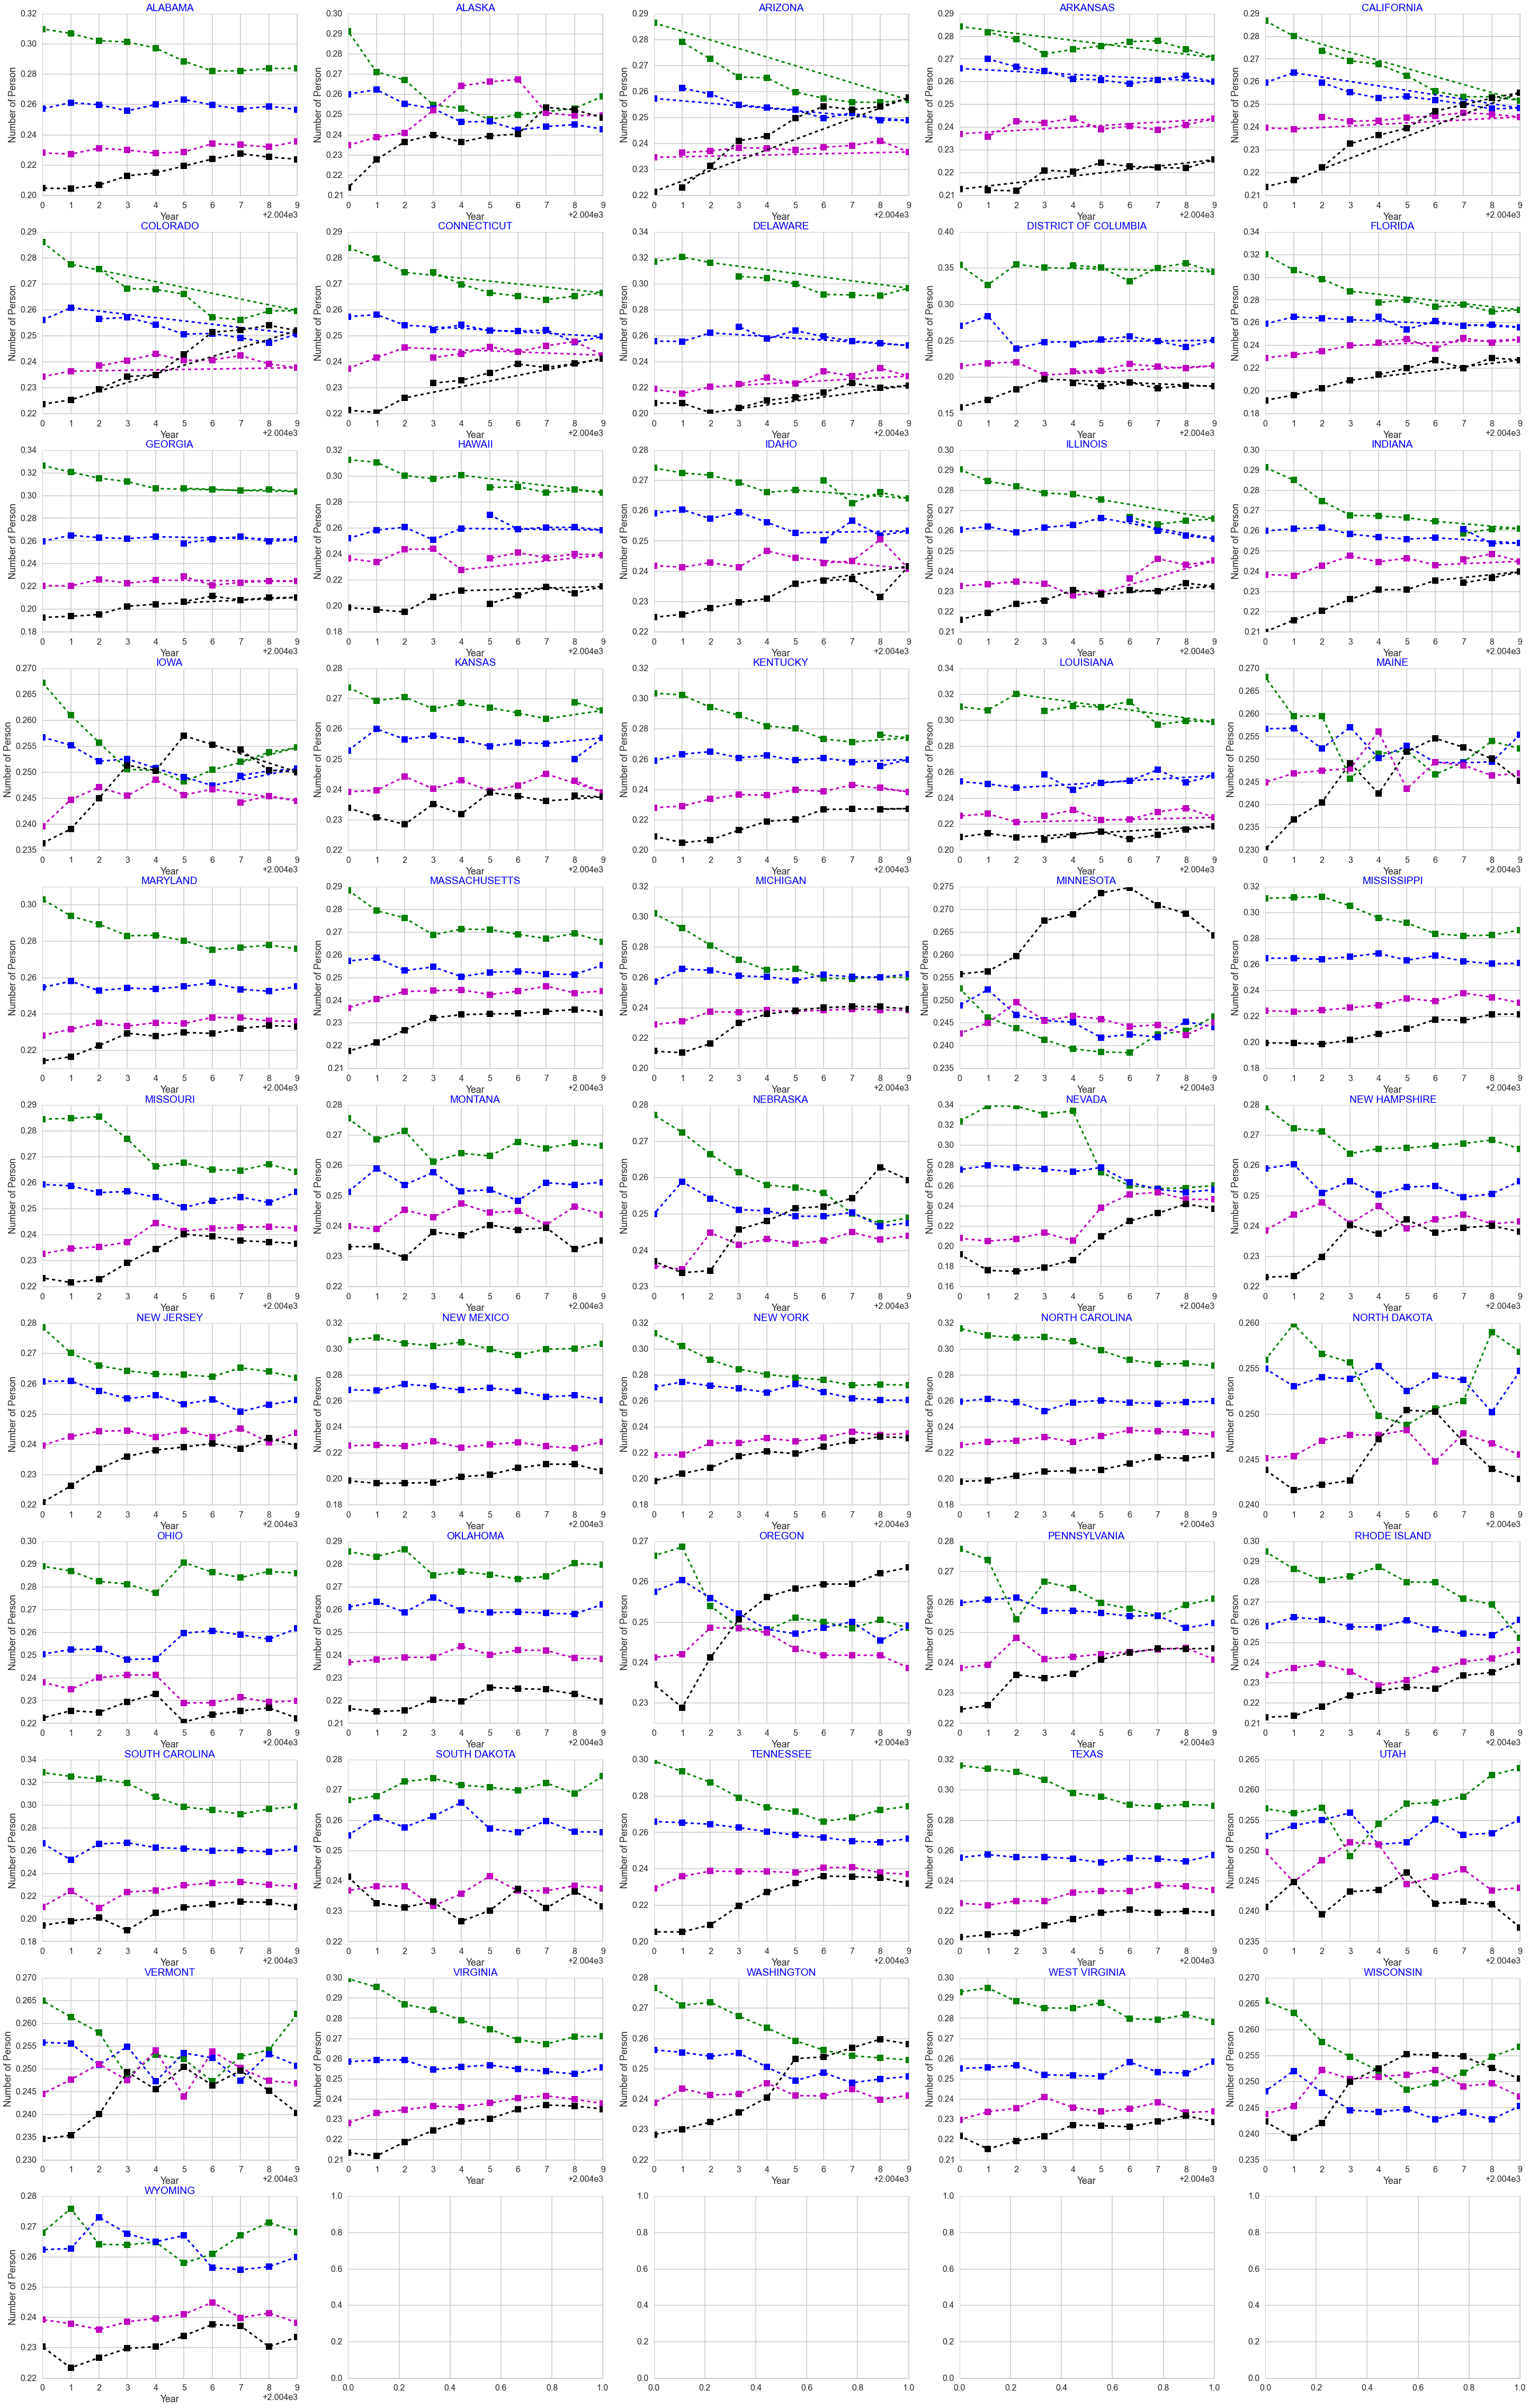

In [14]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states):
    
    years = df_2004_onwards[state]['year']
#     teachers = df_2004_onwards[state]['secondary_teachers']
    grade9 = df_2004_onwards[state]['grade_9_students_enrollment']
    grade10 = df_2004_onwards[state]['grade_10_students_enrollment']
    grade11 = df_2004_onwards[state]['grade_11_students_enrollment']
    grade12 = df_2004_onwards[state]['grade_12_students_enrollment']
#     no_of_sat_test_takers = df_2004_onwards[state]['no_of_sat_test_takers']
    
#     ax.plot(index, teachers, 'o--', color='r', lw=3, label="Teachers")
    ax.plot(years, grade9, 's--', color='g', lw=3, label="Grade 9")
    ax.plot(years, grade10, 's--', color='b', lw=3, label="Grade 10")
    ax.plot(years, grade11, 's--', color='m', lw=3, label="Grade 11")
    ax.plot(years, grade12, 's--', color='k', lw=3, label="Grade 12")
#     ax.plot(index, no_of_sat_test_takers, 'd--', color='c', lw=3, label="SAT Test Takers")
    
    ax.set_title(state, color='blue')
    ax.set_xlim((2004, 2013))
#     ax.set_ylim((0, 600000))
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Person")

#### <font color='red'>Note: y-limit have not been set consistently across the sub-plots</font>

C:\Users\ssabetaz\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


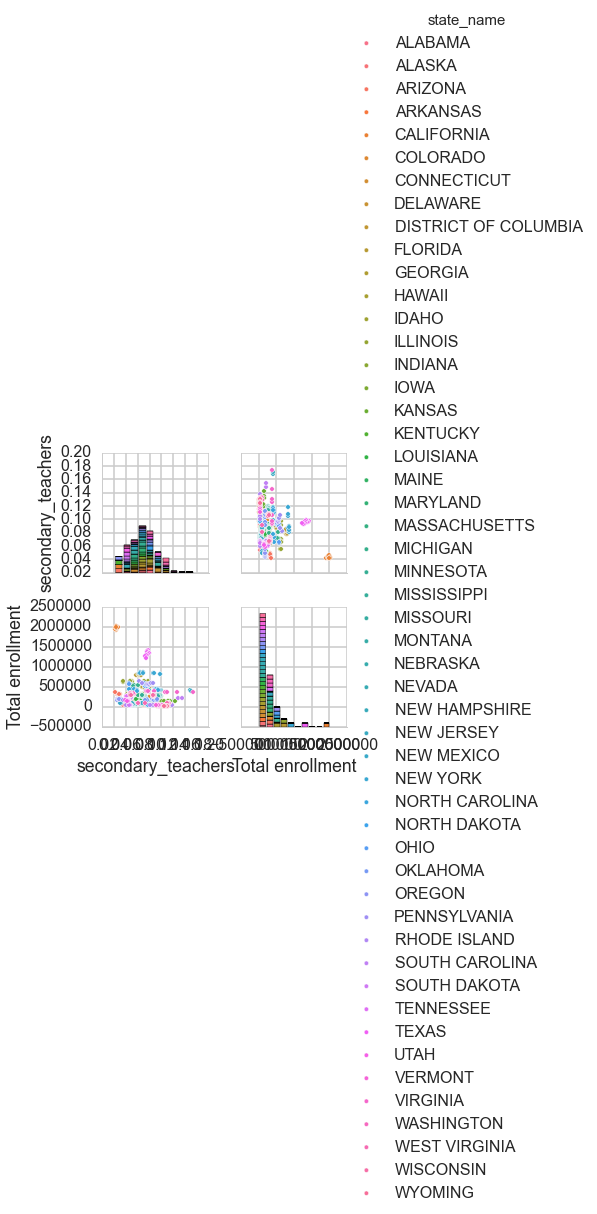

In [15]:
g = sns.pairplot(df_merged_2004_onwards, vars=["secondary_teachers", "Total enrollment"],
hue="state_name")

### 2. Students' dropouts (2004 to 2013)

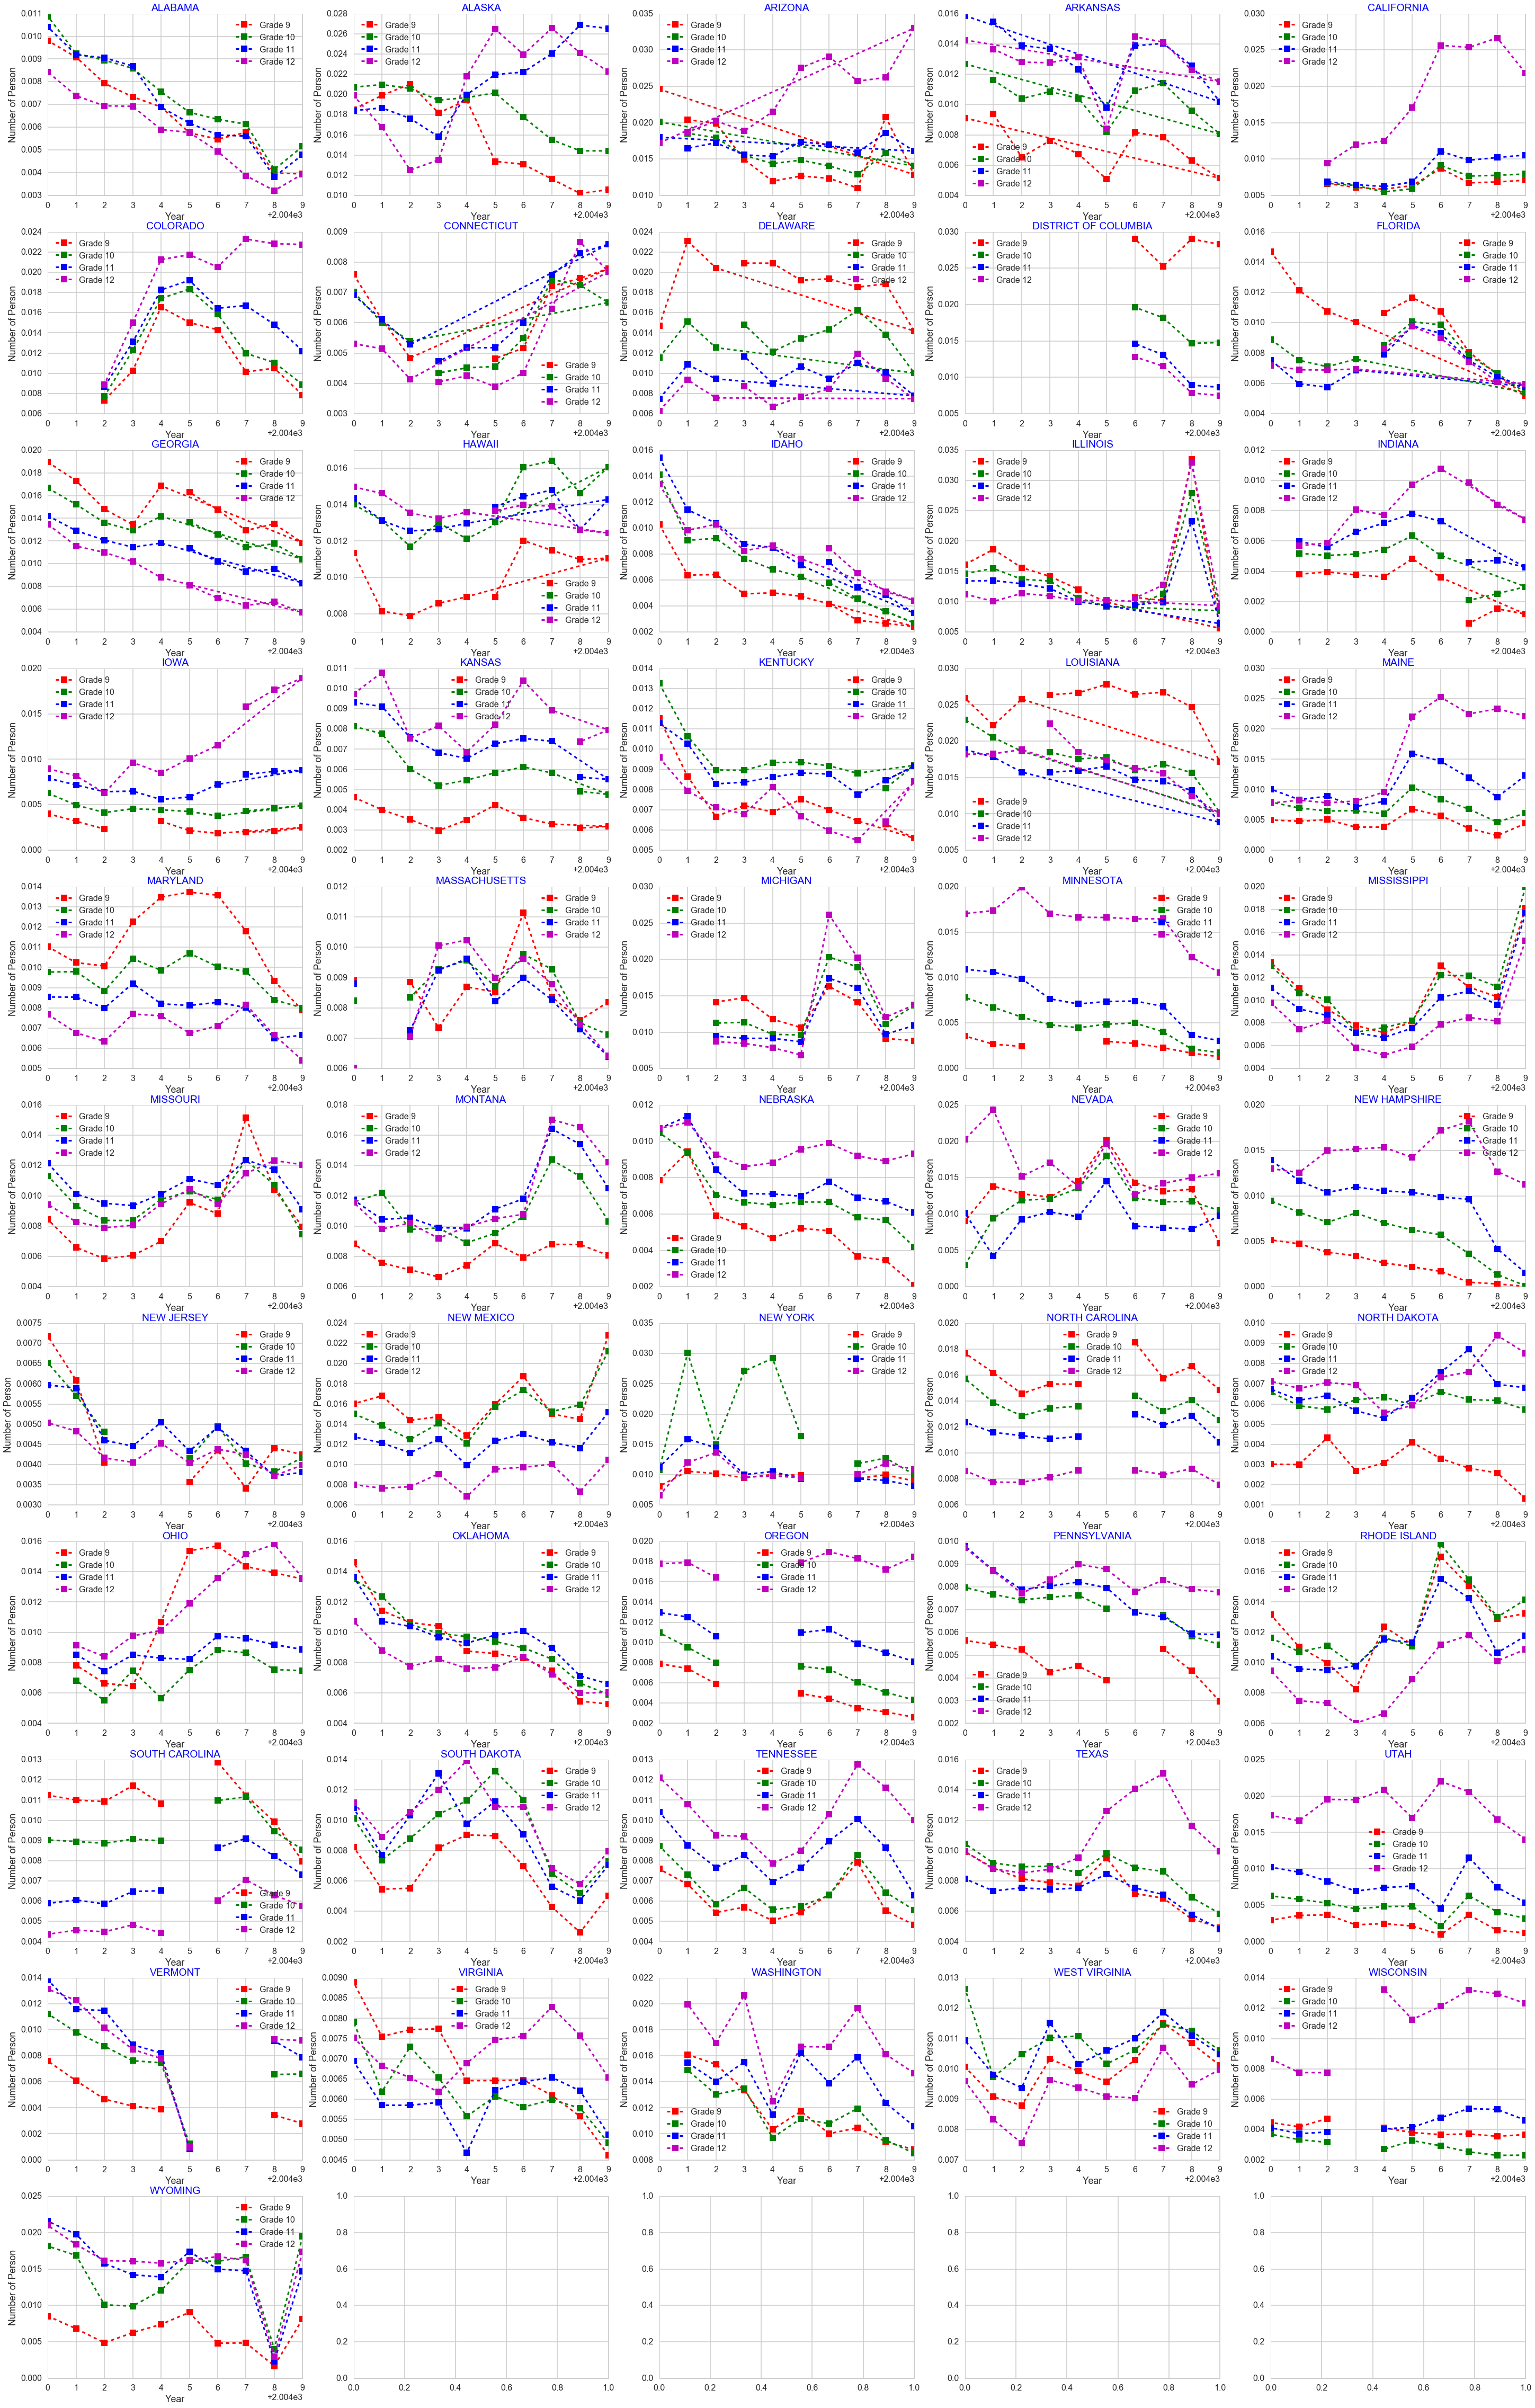

In [14]:
# Create a 11x5 grid of plots
fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# Iterate the subplots
for ax, state in zip(axes.ravel(), list_states):
    
    years = df_2004_onwards[state]['year']
    grade9 = df_2004_onwards[state]['grade_9_dropouts']
    grade10 = df_2004_onwards[state]['grade_10_dropouts']
    grade11 = df_2004_onwards[state]['grade_11_dropouts']
    grade12 = df_2004_onwards[state]['grade_12_dropouts']

    ax.plot(years, grade9, 's--', color='r', lw=3, label="Grade 9")
    ax.plot(years, grade10, 's--', color='g', lw=3, label="Grade 10")
    ax.plot(years, grade11, 's--', color='b', lw=3, label="Grade 11")
    ax.plot(years, grade12, 's--', color='m', lw=3, label="Grade 12")
    
    ax.set_title(state, color='blue')
    ax.set_xlim((2004, 2013))
#     ax.set_ylim((0, 2000))
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Person")
    ax.legend(loc='best')

#### <font color='red'>Note: "Year" label for x-limit not showing (suspect due to NaN in the dropouts data)</font>

### 3. SAT section scores (2004 to 2013)

In [15]:
# # Create a 11x5 grid of plots
# fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# # Iterate the subplots
# for ax, state in zip(axes.ravel(), list_states):
    
#     years = df_2004_onwards[state]['year']
    
#     critical_reading_mean = df_2004_onwards[state]['critical_reading_mean']
#     critical_reading_sd = df_2004_onwards[state]['critical_reading_sd']
#     mathematics_mean = df_2004_onwards[state]['mathematics_mean']
#     mathematics_sd = df_2004_onwards[state]['mathematics_sd']
#     writing_mean = df_2004_onwards[state]['writing_mean']
#     writing_sd = df_2004_onwards[state]['writing_sd']
    
#     ax.errorbar(years - 0.25, critical_reading_mean, critical_reading_sd, fmt='o', ecolor='c', color='r', label="Critical Reading")
#     ax.errorbar(years, mathematics_mean, mathematics_sd, fmt='o', ecolor='c', color='g', label="Mathematics")
#     ax.errorbar(years + 0.25, writing_mean, writing_sd, fmt='o', ecolor='c', color='b', label="Writing")
    
#     ax.set_title(state, color='blue')
#     ax.set_xlim((2004, 2013))
#     ax.set_ylim((0, 800))
#     ax.set_xlabel("Year")
#     ax.set_ylabel("SAT Section Scores")
#     ax.legend(loc='lower right')

#### <font color='red'>Note: y-limit for the subplots above are not identical</font>

### 4. Current Population Survey (CPS) (2003 to 2013)

In [16]:
# # Create a 11x5 grid of plots
# fig, axes = plt.subplots(nrows=11, ncols=5, figsize=(50, 80))

# # Iterate the subplots
# for ax, state in zip(axes.ravel(), list_states):
    
#     years = df_2004_onwards[state]['year']
#     no_high_school_diploma = df_2004_onwards[state]['no_high_school_diploma']
#     high_school_or_equivalent = df_2004_onwards[state]['high_school_or_equivalent']
#     some_college_less_than_4_yr_degree = df_2004_onwards[state]['some_college_less_than_4_yr_degree']
#     bachelors_degree_or_higher = df_2004_onwards[state]['bachelors_degree_or_higher']
    
#     ax.plot(years, no_high_school_diploma, 'o--', color='r', lw=3, label="no_high_school_diploma")
#     ax.plot(years, high_school_or_equivalent, 's--', color='g', lw=3, label="high_school_or_equivalent")
#     ax.plot(years, some_college_less_than_4_yr_degree, 's--', color='b', lw=3, label="some_college_less_than_4_yr_degree")
#     ax.plot(years, bachelors_degree_or_higher, 's--', color='m', lw=3, label="bachelors_degree_or_higher")
    
#     ax.set_title(state, color='blue')
#     ax.set_xlim((2003, 2013))
# #     ax.set_ylim((0, 1000))
#     ax.set_xlabel("Year")
#     ax.set_ylabel("Number of Person")

#### <font color='red'>Note: x-limit for CPS and number of secondary teachers are not identical</font>
#### <font color='red'>Note: y-limit for the CPS subplots above are not identical</font>

### 5. PairPlot

/Users/cjl6/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


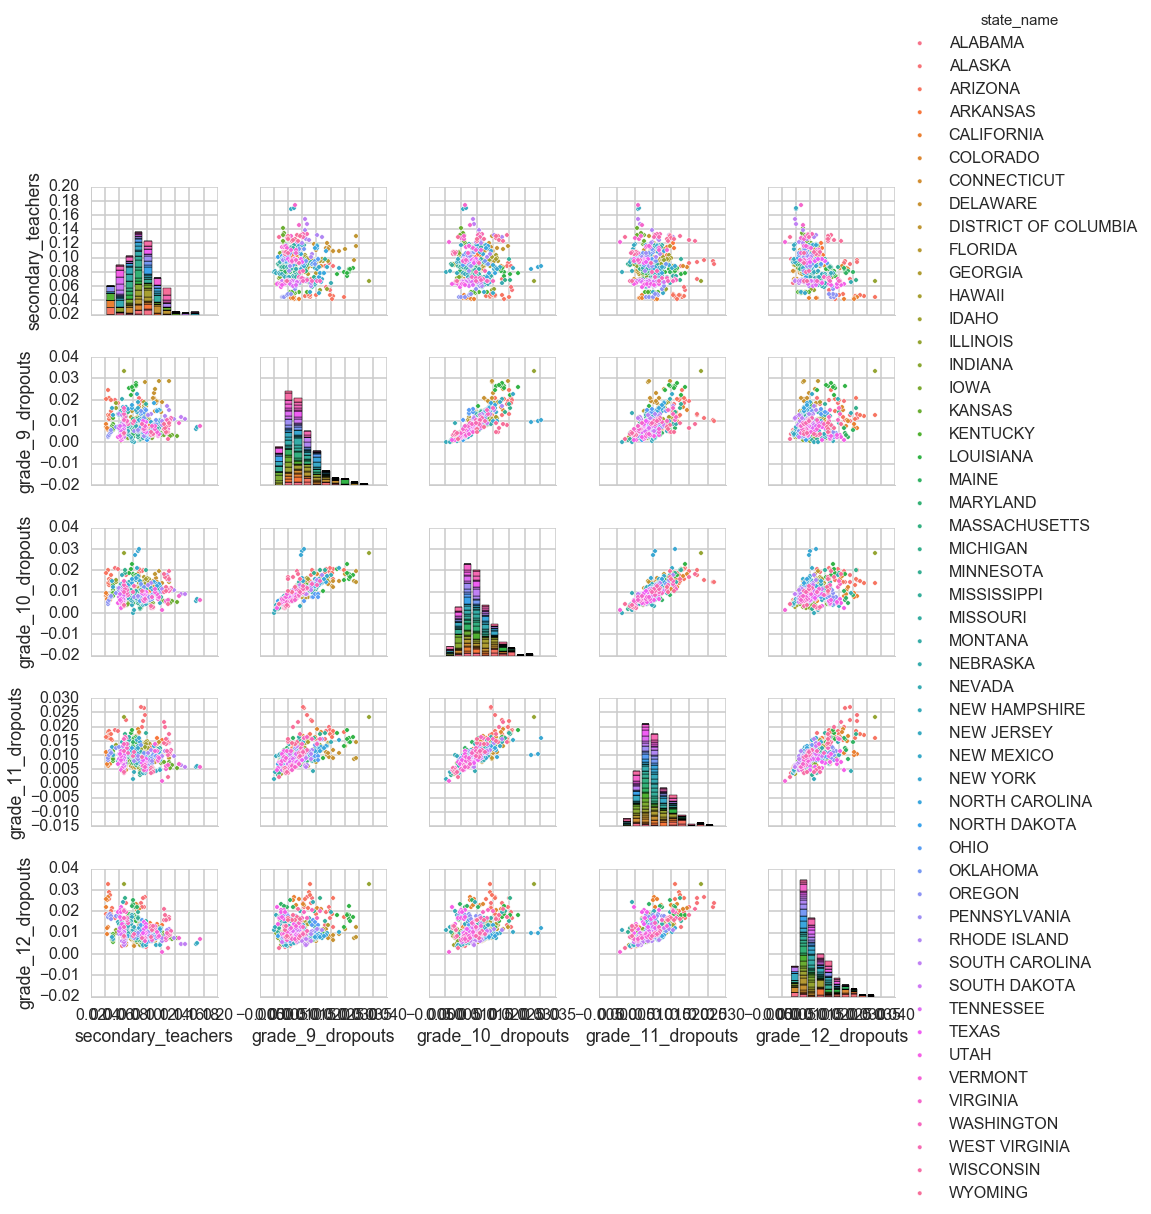

In [17]:
# Reference:
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html
g = sns.pairplot(df_merged_2004_onwards, vars=["secondary_teachers", "grade_9_dropouts","grade_10_dropouts",'grade_11_dropouts','grade_12_dropouts'],
                 hue="state_name")

## <font color='Blue'>Principal Component Analysis (PCA)</font>

#### <font color='red'>We might not need PCA as there are only 71 number of features</font>

In [19]:
from sklearn.decomposition import PCA

In [20]:
# Maintain our dimensionality at 71
pca = PCA(n_components=71)
X = pca.fit_transform(train_test_df)

In [21]:
print pca.explained_variance_ratio_.sum()

1.0


The explained variance ratio `pca.explained_variance_ratio_` tells us how much of the variation in the features is explained by these 71 features. When we sum it up over the features, we see that 1% is explained: good enough to go down to a ?? dimensional space from a ??? dimensional one!

We can see the individual variances as we increase the dimensionality:

In [22]:
pca.explained_variance_ratio_*100

array([  9.99999856e+01,   1.41028938e-05,   1.75470199e-07,
         8.69627454e-08,   3.34752724e-08,   1.14071176e-08,
         4.74477557e-09,   2.43534525e-09,   2.25810008e-09,
         1.22795374e-09,   1.08559425e-09,   3.10144779e-12,
         1.66306808e-12,   9.17592586e-13,   4.32084605e-13,
         3.42354208e-13,   3.06555904e-13,   2.23518445e-13,
         1.38042173e-13,   1.13864601e-13,   6.92138645e-14,
         5.01734846e-14,   3.03154944e-14,   1.61954879e-14,
         8.72218762e-15,   5.88831847e-15,   3.78047169e-15,
         3.25230497e-15,   2.92472180e-15,   1.95447694e-15,
         1.53565609e-15,   1.17598069e-15,   9.21617322e-16,
         8.42713931e-16,   7.06286743e-16,   6.46775131e-16,
         5.78183914e-16,   5.35809786e-16,   4.92881205e-16,
         4.14108565e-16,   2.85179388e-16,   2.53886630e-16,
         2.18616083e-16,   1.63675580e-16,   1.41642460e-16,
         1.22228066e-16,   1.07554934e-16,   9.63281288e-17,
         8.82763614e-17,

The first dimension accounts for ???% of the variation, the second ?%, and it goes steadily down from there.

Let us create a dataframe with these ??? features labelled pc1,pc2...,pc60 and the labels of the sample:

## <font color='Blue'>Create train and test set</font>

In [28]:
#Preparing train and test date
#Creating mask for train and test set

from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(train_test_df.shape[0]), train_size=0.8)

mask=np.ones(train_test_df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [29]:
mask.shape, mask.sum()

((175,), 140)

In [30]:
# create seperate train and test dataframe

train_df = train_test_df[mask]
test_df = train_test_df[mask==False]

In [31]:
#Creating train and test data set

train_Y_response = train_df['no_of_sat_test_takers']
test_Y_response = test_df['no_of_sat_test_takers']

# Drop the Y_response
train_X_data = train_df.drop('no_of_sat_test_takers', 1)
test_X_data = test_df.drop('no_of_sat_test_takers', 1)

print  train_X_data.shape, train_Y_response.shape, test_X_data.shape, test_Y_response.shape

(140, 70) (140,) (35, 70) (35,)


In [32]:
train_df.shape

(140, 71)

In [33]:
test_df.shape

(35, 71)

## <font color='Blue'>Linear Regression</font>

In [34]:
# http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
clf_LinearRegression_1 = LinearRegression()
scores_LinearRegression_1 = cross_validation.cross_val_score(clf_LinearRegression_1, X_data, Y_response, cv=5)
print "Cross validation scores", scores_LinearRegression_1
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_LinearRegression_1.mean(), scores_LinearRegression_1.std() * 2))

Cross validation scores [ 0.72379583  0.8597755   0.56105726  0.79950166  0.72582283]
Accuracy: 0.73 (+/- 0.20)


In [38]:
clf_LinearRegression_2 = LinearRegression()

parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
gs_LinearRegression_2 = GridSearchCV(clf_LinearRegression_2, param_grid=parameters, cv=5)
gs_LinearRegression_2.fit(train_X_data, train_Y_response)
print "BEST PARAMS", gs_LinearRegression_2.best_params_
best_LinearRegression_2 = gs_LinearRegression_2.best_estimator_
print best_LinearRegression_2

BEST PARAMS {'copy_X': True, 'normalize': True, 'fit_intercept': False}
LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)


In [39]:
clf_LinearRegression_2 = best_LinearRegression_2
clf_LinearRegression_2 = clf_LinearRegression_2.fit(train_X_data, train_Y_response)
training_accuracy = clf_LinearRegression_2.score(train_X_data, train_Y_response)
test_accuracy = clf_LinearRegression_2.score(test_X_data,  test_Y_response)
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.98
Accuracy on test data:     0.79


## <font color='Blue'>Linear Model - Lasso</font>

In [40]:
from sklearn import linear_model

clf = linear_model.Lasso()
scores = cross_validation.cross_val_score(clf, X_data, Y_response, cv=5)
print "Cross validation scores", scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross validation scores [ 0.62320441  0.82165301  0.61834807  0.48603496  0.52639617]
Accuracy: 0.62 (+/- 0.23)


In [41]:
# Linear model with Lasso - 5-fold cross validation with training data
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV

clf = linear_model.Lasso()

parameters = {"alpha": [0.0001, 0.001, 0.1, 1, 10, 100]}
gs = GridSearchCV(clf, param_grid=parameters, cv=5)
gs.fit(train_X_data, train_Y_response)
print "BEST PARAMS", gs.best_params_
best = gs.best_estimator_
print best


BEST PARAMS {'alpha': 0.0001}
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


/Users/cjl6/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:444: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [42]:
best.alpha

0.0001

In [43]:
#Calculate training and test data accuracy
clf = best
clf=clf.fit(train_X_data, train_Y_response)
training_accuracy = clf.score(train_X_data, train_Y_response)
test_accuracy = clf.score(test_X_data,  test_Y_response)
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.92
Accuracy on test data:     0.93


In [44]:
# Run cross validation again with best fitted alpha
#from sklearn import linear_model
#from sklearn.grid_search import GridSearchCV

#clf = linear_model.Lasso(alpha=best.alpha)
#scores = cross_validation.cross_val_score(clf, train_X_data, train_Y_response, cv=5)
#print "Cross validation scores", scores
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## <font color='Blue'>Bayesian Ridge</font>

In [45]:
# http://scikit-learn.org/stable/modules/linear_model.html#bayesian-ridge-regression
from sklearn.linear_model import BayesianRidge

In [46]:
clf_BayesianRidge_1 = linear_model.BayesianRidge()
scores_BayesianRidge_1 = cross_validation.cross_val_score(clf_BayesianRidge_1, X_data, Y_response, cv=5)
print "Cross validation scores", scores_BayesianRidge_1
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_BayesianRidge_1.mean(), scores_BayesianRidge_1.std() * 2))

Cross validation scores [ 0.84016437  0.93695455  0.79135513  0.88611634  0.73519409]
Accuracy: 0.84 (+/- 0.14)


In [47]:
clf_BayesianRidge_2 = linear_model.BayesianRidge()

parameters = {"alpha_1": [0.0001, 0.001, 0.1, 1, 10, 100], "alpha_2": [0.0001, 0.001, 0.1, 1, 10, 100]}
gs_BayesianRidge_2 = GridSearchCV(clf_BayesianRidge_2, param_grid=parameters, cv=5)
gs_BayesianRidge_2.fit(train_X_data, train_Y_response)
print "BEST PARAMS", gs_BayesianRidge_2.best_params_
best_BayesianRidge_2 = gs_BayesianRidge_2.best_estimator_
print best_BayesianRidge_2

BEST PARAMS {'alpha_2': 0.001, 'alpha_1': 0.0001}
BayesianRidge(alpha_1=0.0001, alpha_2=0.001, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)


In [48]:
clf_BayesianRidge_2 = best_BayesianRidge_2
clf_BayesianRidge_2 = clf_BayesianRidge_2.fit(train_X_data, train_Y_response)
training_accuracy = clf_BayesianRidge_2.score(train_X_data, train_Y_response)
test_accuracy = clf_BayesianRidge_2.score(test_X_data,  test_Y_response)
print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.92
Accuracy on test data:     0.93
